# Develop Your First Machine Learning Model

This notebook accompanies the article **Step-by-Step Tutorial to Building Your First Machine Learning Model**. The development process follows the standard steps, which are:

1. **Business Understanding**

2. **Data Collection and Preparation**
   - Collecting Data
   - Exploratory Data Analysis (EDA)
   - Data Cleaning

3. **Building the Machine Learning Model**
   - Choosing the Right Model
   - Splitting the Data
   - Training the Model
   - Model Evaluation

4. **Model Optimization**
   - Hyperparameter Tuning
   - Improving Model Performance

5. **Deploying the Model**
   -
Settig Up a Simple API


## Business Understanding

## Data Collection and Preparation
Collecting Data

For the dataset, we would use the Telecom Churn dataset come from the Kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [1]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Display numerical summary statistics of the dataset
df.describe()

# Display categorical summary statistics of the dataset
df.describe(exclude = 'number')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [5]:
from IPython.display import display, HTML

# Compute the summary statistics for numerical and categorical columns
desc_num = df.describe()
desc_cat = df.describe(exclude='number')

# Display the results side by side
display(HTML('<h3>Numerical Features</h3>'))
display(desc_num)
display(HTML('<h3>Categorical Features</h3>'))
display(desc_cat)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
print("Distribution of Target Variable:")
print(df['Churn'].value_counts())

Distribution of Target Variable:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [11]:
import numpy as np

df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

In [31]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('str')

In [ ]:
df['ChurnTarget'] = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>,
        <Axes: title={'center': 'TotalCharges'}>,
        <Axes: title={'center': 'ChurnTarget'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

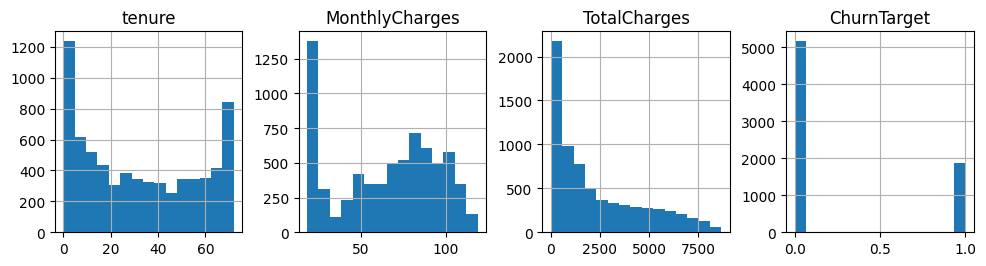

In [32]:
# Plot distribution of numerical features

num_features = df.select_dtypes('number').columns
df[num_features].hist(bins=15, figsize=(15, 6), layout=(2, 5))

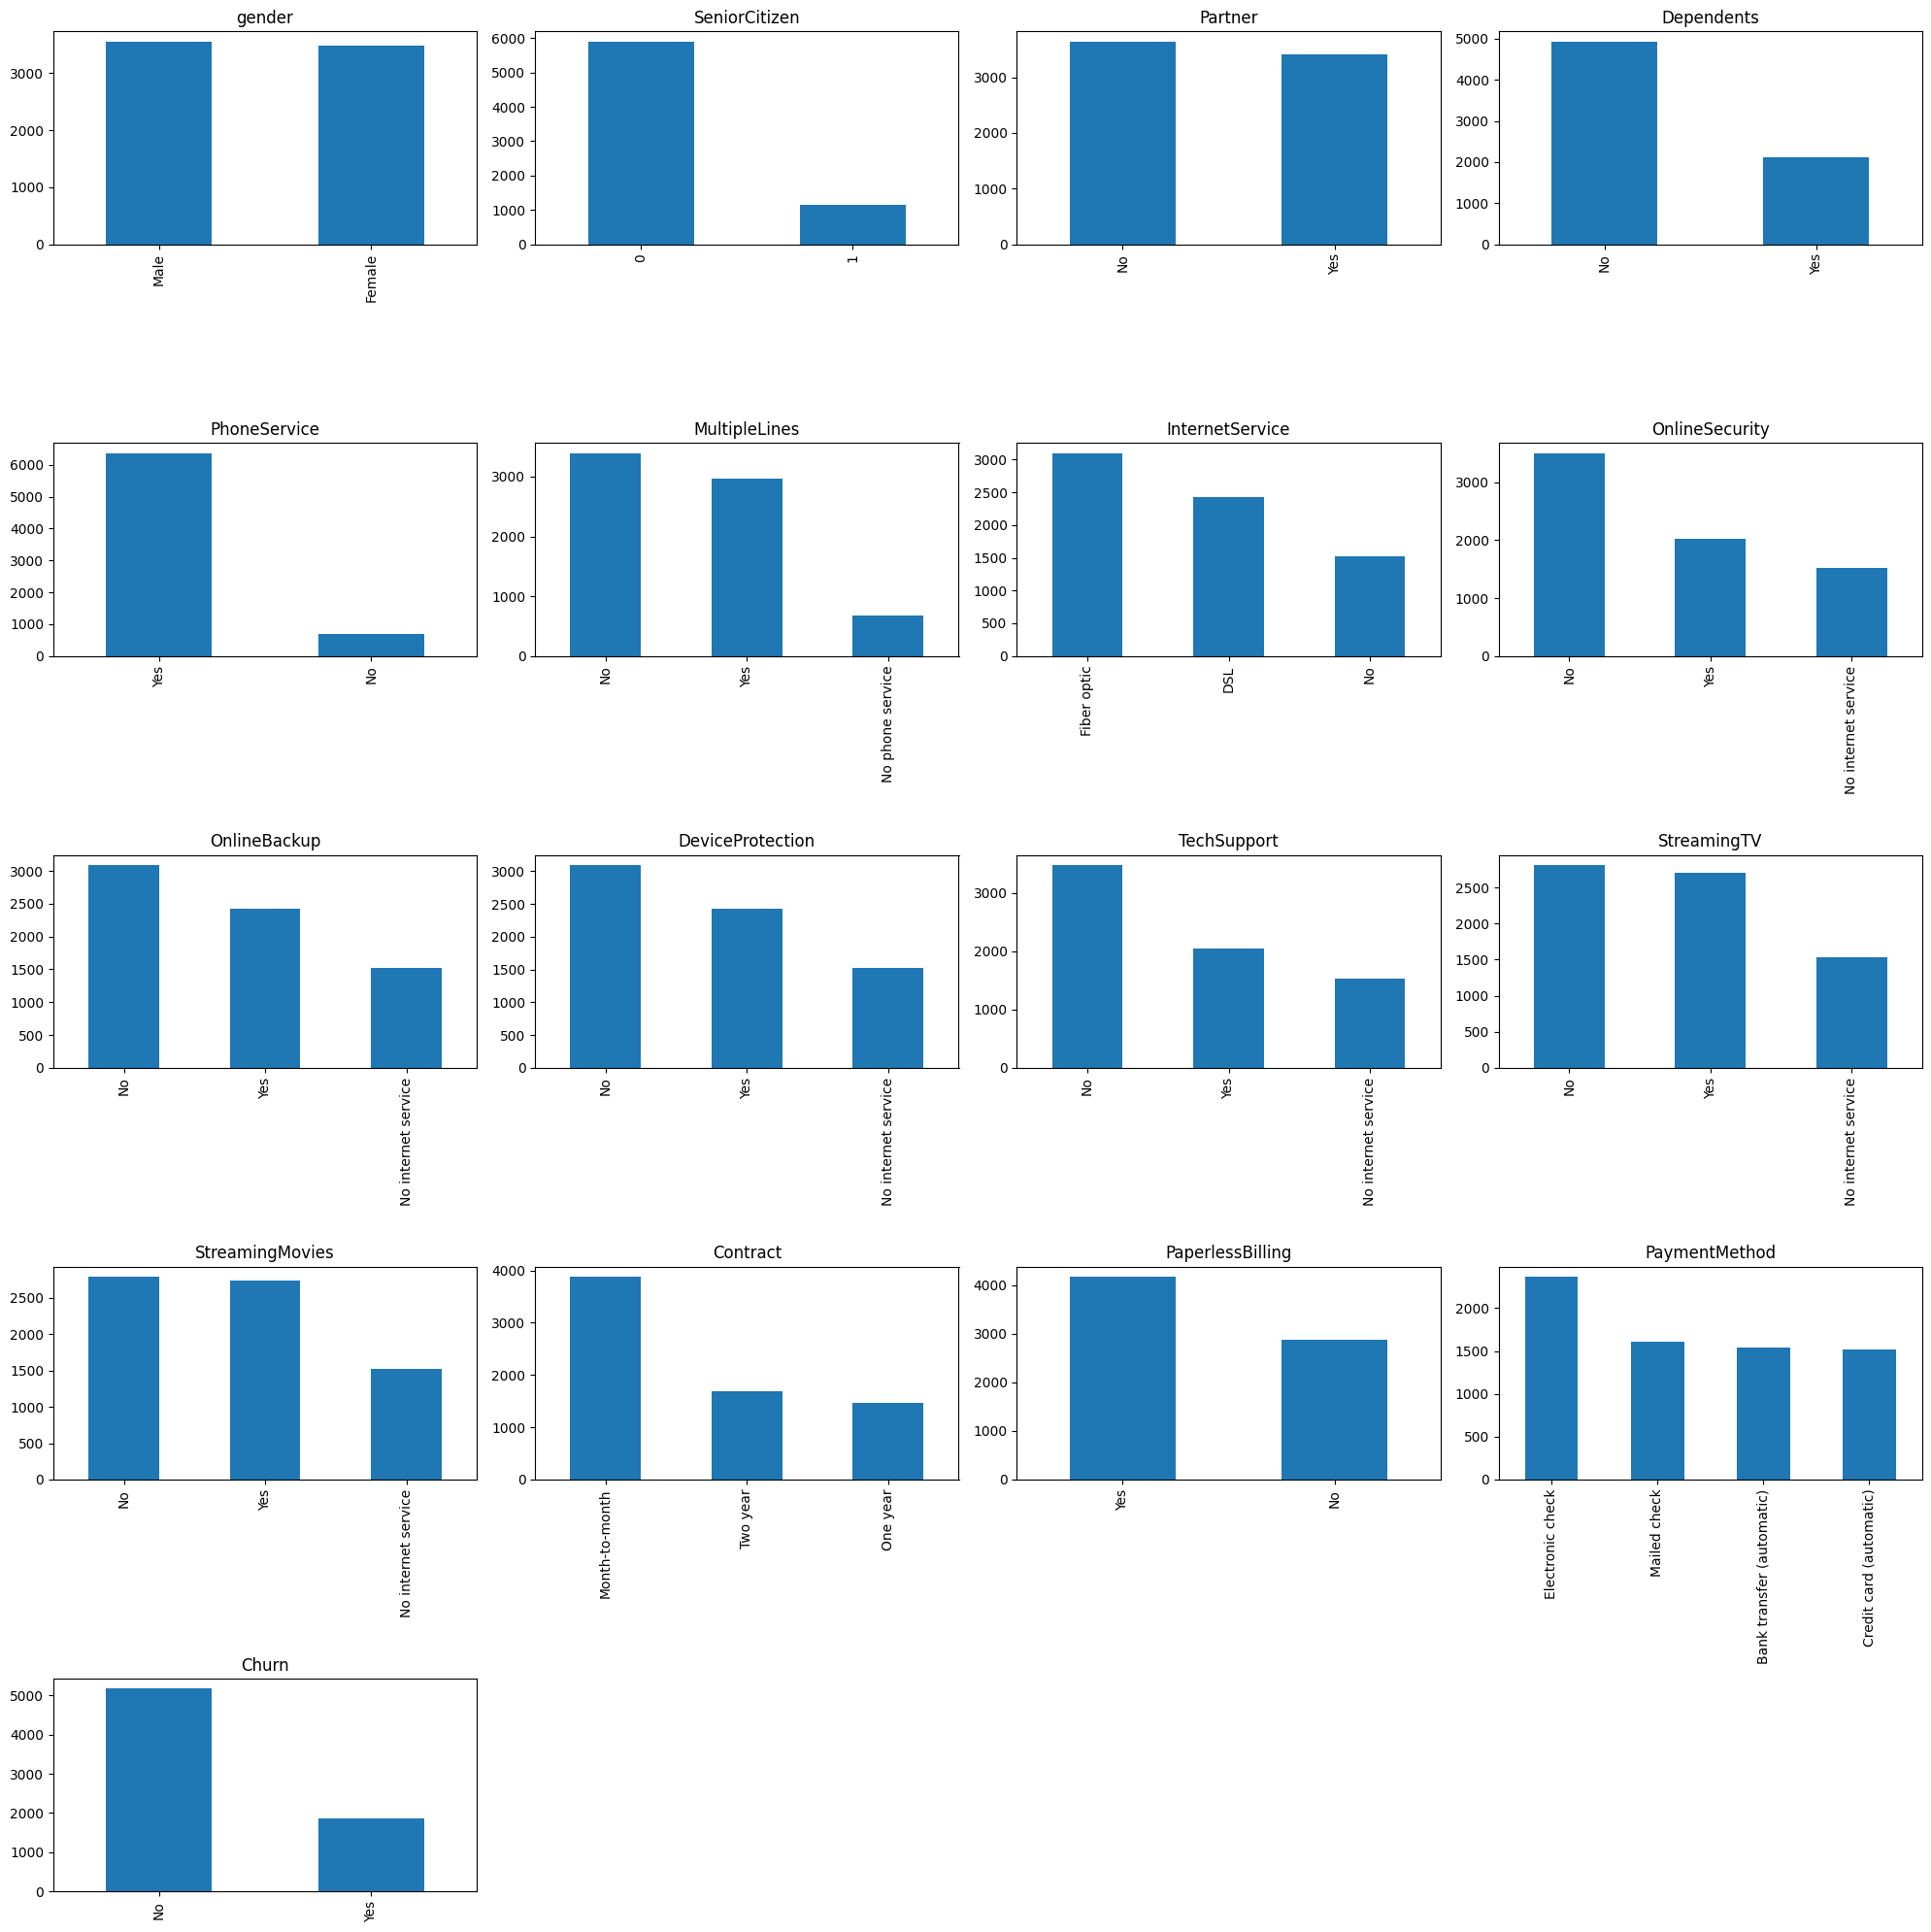

In [34]:
import matplotlib.pyplot as plt
# Plot distribution of categorical features
cat_features = df.drop(['customerID'], axis =1).select_dtypes(include='object').columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_features, 1):
    plt.subplot(5, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(col)

plt.tight_layout()  # Adjust the layout
plt.savefig('categorical_features_distribution.png')
plt.show()

In [33]:
df[num_features].corr()

,tenure,MonthlyCharges,TotalCharges,ChurnTarget
tenure,1.000000,0.247900,0.826178,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.198324
ChurnTarget,-0.352229,0.193356,-0.198324,1.000000


C:\Users\corne\AppData\Local\Temp\ipykernel_8392\3740838431.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


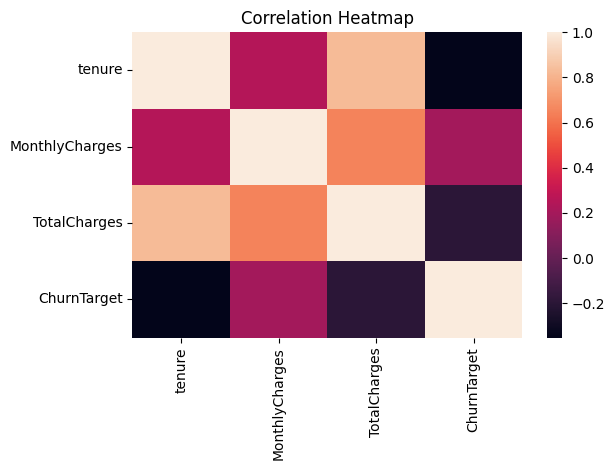

In [35]:
import seaborn as sns
# Select numerical features
num_features = df.select_dtypes(include=[float, int]).columns

# Plot correlations between numerical features
# plt.figure(figsize=(12, 10))  # Increased the figure size for better visibility
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')

plt.tight_layout()  # Adjust the layout
plt.savefig('correlation_heatmap.png')
plt.show()

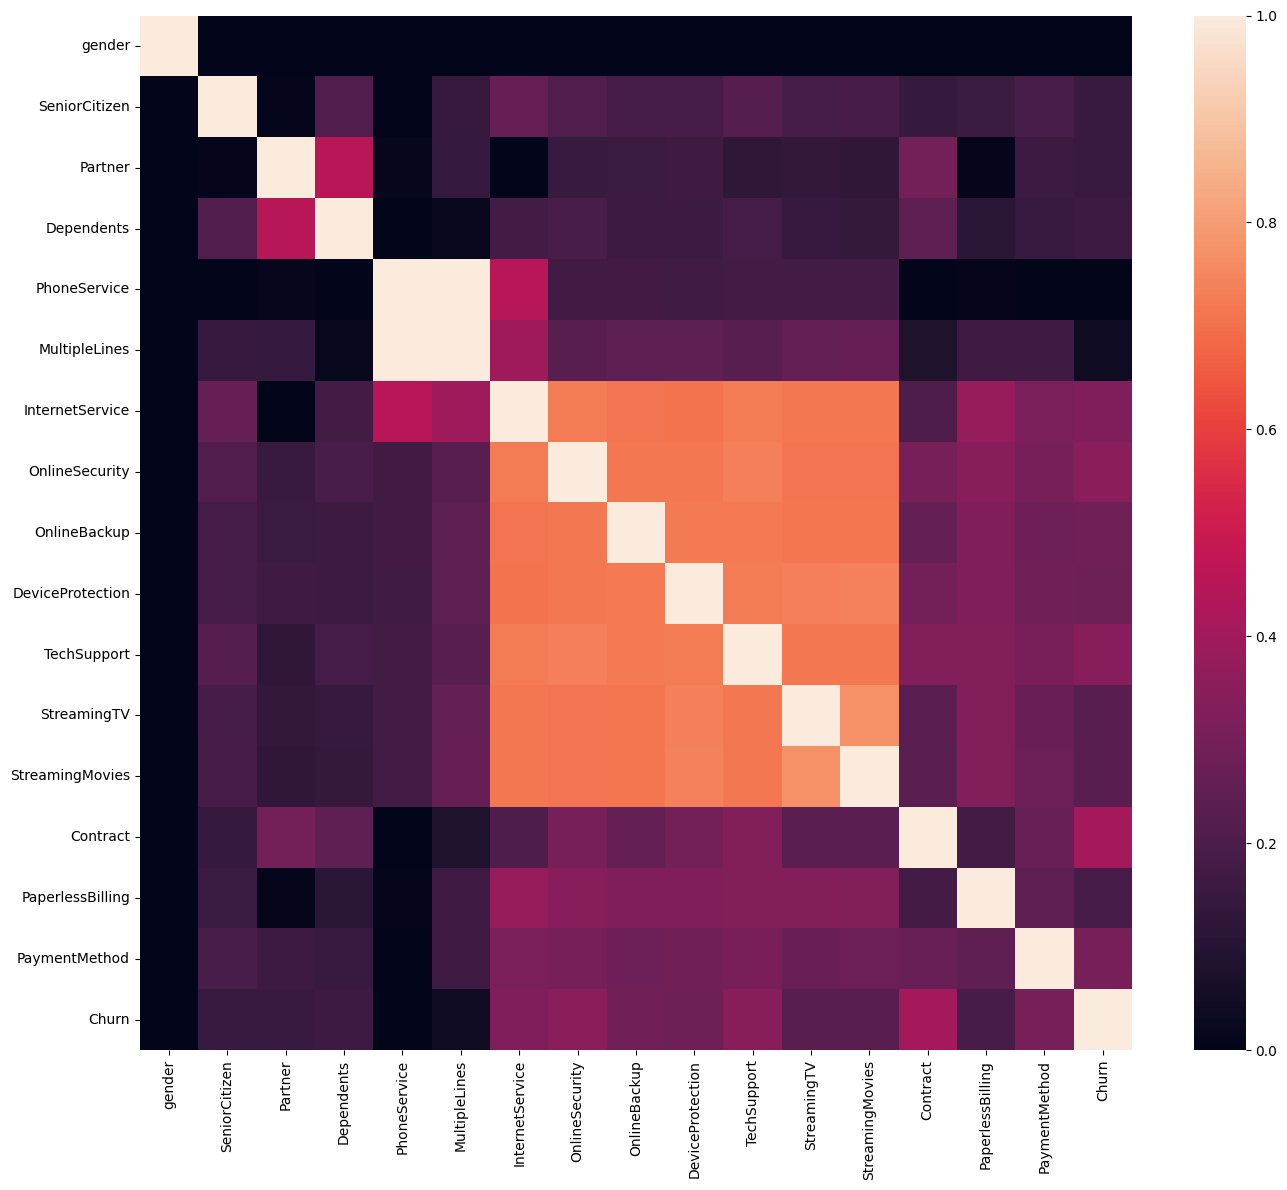

In [36]:
from dython.nominal import associations

# Calculate the associations (including Cramér's V) and get the correlation matrix
assoc = associations(df[cat_features], nominal_columns='all', plot=False)

# Extract the correlation matrix
corr_matrix = assoc['corr']

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix)

plt.tight_layout()  # Adjust the layout
plt.savefig('category_correlation_heatmap.png')
plt.show()

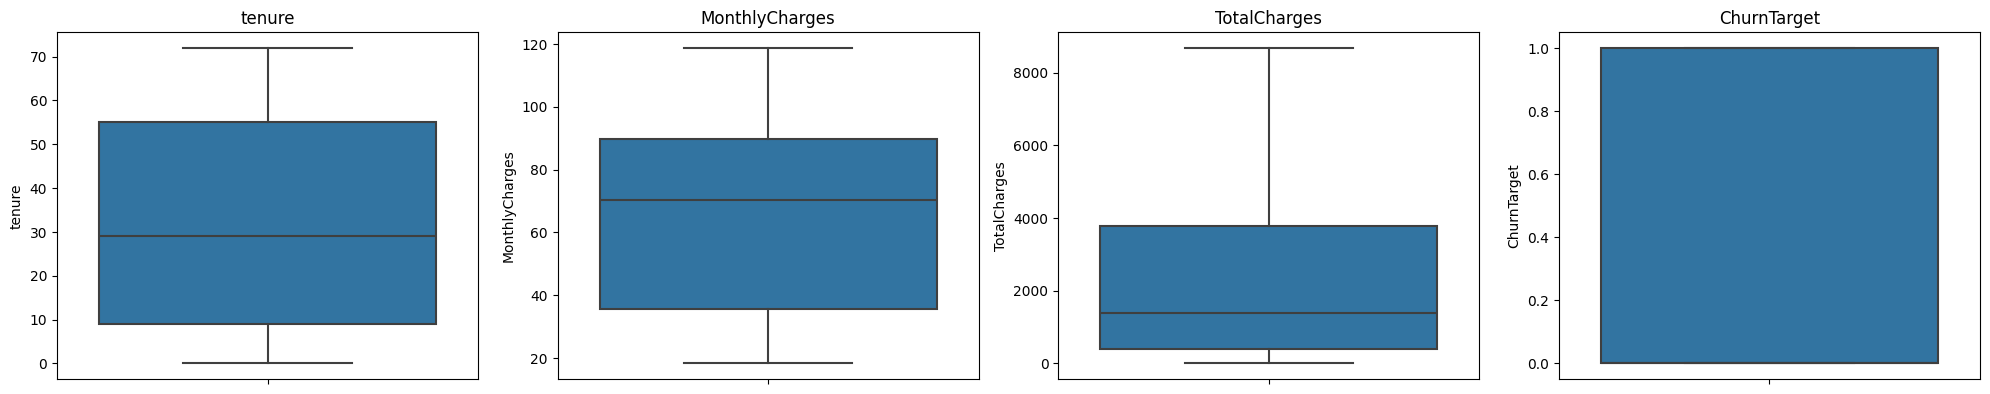

In [37]:
# Plot box plots to identify distributions and potential outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.savefig('numerical_features_boxplots.png')
plt.show()

## Feature Selection

In [79]:
# Define the target variable and numerical features
target = 'ChurnTarget'
num_features = df.select_dtypes(include=[np.number]).columns.drop(target)

# Calculate correlations
correlations = df[num_features].corrwith(df[target])

# Set a threshold for feature selection (e.g., absolute correlation > 0.1)
threshold = 0.3
selected_num_features = correlations[abs(correlations) > threshold].index.tolist()

print("Selected Numerical Features:")
print(selected_num_features)

Selected Numerical Features:
['tenure']


In [80]:
categorical_target = 'Churn'

assoc = associations(df[cat_features], nominal_columns='all', plot=False)

corr_matrix = assoc['corr']

threshold = 0.3
selected_cat_features = corr_matrix[corr_matrix.loc[categorical_target] > threshold ].index.tolist()
del selected_cat_features[-1]

print("Selected Categorical Features:")
print(selected_cat_features)

Selected Categorical Features:
['InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaymentMethod']


In [81]:
selected_features = []
selected_features.extend(selected_num_features)
selected_features.extend(selected_cat_features)

In [83]:
selected_features

['tenure',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'Contract',
 'PaymentMethod']

## Model Building

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

target = 'ChurnTarget' 

# Separate features and target variable
X = df[selected_features]
y = df[target]

# Identify categorical and numerical features
cat_features = X.select_dtypes(include=['object']).columns.tolist()
num_features = X.select_dtypes(include=['number']).columns.tolist()

In [88]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

In [90]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [91]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the logistic regression model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['tenure']),
                                                 ('cat', OneHotEncoder(),
                                                  ['InternetService',
                                                   'OnlineSecurity',
                                                   'TechSupport', 'Contract',
                                                   'PaymentMethod'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [93]:
from sklearn.metrics import classification_report

# Evaluate on the validation set
y_val_pred = pipeline.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [107]:
X_test

,tenure,InternetService,OnlineSecurity,TechSupport,Contract,PaymentMethod
437,72,Fiber optic,Yes,Yes,Two year,Credit card (automatic)
2280,8,Fiber optic,No,Yes,Month-to-month,Credit card (automatic)
2235,41,DSL,Yes,No,One year,Credit card (automatic)
4460,18,Fiber optic,No,Yes,Month-to-month,Electronic check
3761,72,DSL,Yes,No,Two year,Credit card (automatic)
...,...,...,...,...,...,...
5143,49,DSL,Yes,Yes,One year,Mailed check
4439,28,No,No internet service,No internet service,Two year,Credit card (automatic)
3857,5,No,No internet service,No internet service,Month-to-month,Bank transfer (automatic)
4758,56,No,No internet service,No internet service,Two year,Bank transfer (automatic)



Coefficients of the Logistic Regression Model:
                                    Feature  Coefficient
10                  Contract_Month-to-month     0.777028
2               InternetService_Fiber optic     0.657747
4                         OnlineSecurity_No     0.380559
15           PaymentMethod_Electronic check     0.334274
7                            TechSupport_No     0.308960
11                        Contract_One year     0.008745
9                           TechSupport_Yes    -0.009741
0                                    tenure    -0.026084
16               PaymentMethod_Mailed check    -0.042897
6                        OnlineSecurity_Yes    -0.081339
13  PaymentMethod_Bank transfer (automatic)    -0.135586
14    PaymentMethod_Credit card (automatic)    -0.150440
5        OnlineSecurity_No internet service    -0.293869
3                        InternetService_No    -0.293869
8           TechSupport_No internet service    -0.293869
1                       InternetService_

<Figure size 1000x800 with 0 Axes>

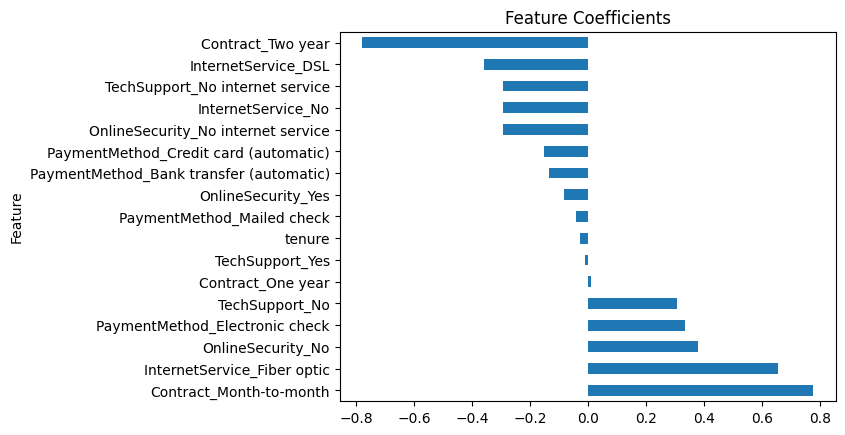

In [94]:
# Explainability - Coefficients Analysis
model = pipeline.named_steps['classifier']
preprocessor = pipeline.named_steps['preprocessor']
onehot_columns = preprocessor.transformers_[1][1].get_feature_names_out(cat_features)
feature_names = num_features + list(onehot_columns)
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("\nCoefficients of the Logistic Regression Model:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 8))
coef_df.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Feature Coefficients')
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV
# Define the logistic regression model within a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define the hyperparameters for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the validation set
y_val_pred = grid_search.predict(X_val)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Evaluate on the test set
y_test_pred = grid_search.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Best Hyperparameters: {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [Info] Start training from score -1.018167
[LightGBM] [Info] Number of positive: 897, number of negative: 2483
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 3380, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265385 -> initscore=-1.018167
[LightGBM] [

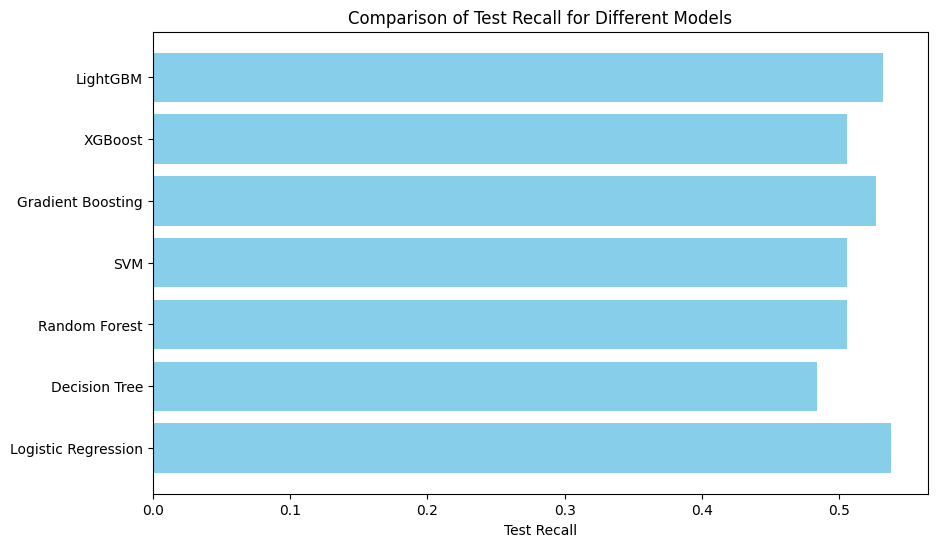

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score

# Define the models and their parameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__max_depth': [3, 6, 9]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.2],
            'classifier__num_leaves': [31, 50, 100]
        }
    }
}

results = []

# Train and evaluate each model
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    # Best model from Grid Search
    best_model = grid_search.best_estimator_
    
    # Evaluate on the validation set
    y_val_pred = best_model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred, pos_label=1)
    
    # Evaluate on the test set
    y_test_pred = best_model.predict(X_test)
    test_recall = recall_score(y_test, y_test_pred, pos_label=1)
    
    # Save results
    results.append({
        'model': model_name,
        'best_params': grid_search.best_params_,
        'val_recall': val_recall,
        'test_recall': test_recall,
        'classification_report_val': classification_report(y_val, y_val_pred),
        'classification_report_test': classification_report(y_test, y_test_pred)
    })

# Plot the test recall scores
plt.figure(figsize=(10, 6))
model_names = [result['model'] for result in results]
test_recalls = [result['test_recall'] for result in results]
plt.barh(model_names, test_recalls, color='skyblue')
plt.xlabel('Test Recall')
plt.title('Comparison of Test Recall for Different Models')
plt.show()

In [105]:
import joblib
# Define the logistic regression model with the best parameters
best_params = {'classifier__C': 1, 'classifier__solver': 'lbfgs'}
logreg_model = LogisticRegression(C=best_params['classifier__C'], solver=best_params['classifier__solver'], max_iter=1000)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Save the model and the label encoder (if used)
joblib.dump(pipeline, 'logreg_model.joblib')

['logreg_model.joblib']